# Loan Predictions Project
### By: Josh Ho

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible Hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### **My Hypotheses**

Elibility May Be Impacted By:
1. Applicants who have or do not have dependents. Do they have no children? Do they have 1-2? They have 3? Do they have 4+? Applicants with dependents mean they require higher incomes to provide sustainable and comfortable lives for those whom rely on them and themselves. They can be seen as the "breadwinner" and main financial supporter.
2. The size of the loan the applicant is applying for. Are they asking for a few thousand, hundreds of thousands, or even millions? Depending on the size of the loan, the institution providing the money may be parting with a larger sum, which could reflect higher risk.
3. The reason for why the applicant is taking out a loan. Is it for a large purchase like a home, or new vehicle? Is it to start a business, or pay for post-secondary tuition? Is it to go on a lavish vacation, or pay off a higher interest loan? The reason for the loan, and the intent of how the money will be used, are all things that may impact the applicants eligibility.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [350]:
# Load modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) # Set figure size

# Load dataset
loan = pd.read_csv("data.csv") 
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [351]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [352]:
# Check for nulls
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [353]:
# Preview a column with nulls
loan[loan['Self_Employed'].isna()].reset_index(drop=True).head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
1,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
2,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
3,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
4,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
5,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
6,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
7,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
8,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
9,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


Look at some basic statistics for numerical variables.

In [354]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [355]:
# There are 475 applicants out of the 614 that have a credit history (value=1)
len(loan[loan['Credit_History'] == 1])

475

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

Overall, the applicant and co-applicant income distribution do fall in line with my expectations. This is because when looking at salaries in the real world, we do see an average salary that encapsulates the majority of the population and the lower to middle class. In our summary of statistics, we have applicant incomes ranging from a very low amount (considerably the lower income/impoverished) to the middle class, and then a max that is clearly an outlier. That max would represent the very few who are much wealthier than the average and poorer populations. A similar pattern reflected in the real world can be seen in the co-applicant income, in which the min and Q1 individuals have 0 income. This is plausible, as the co-applicant could be a spouse who is may not be working and earning income (possibly due to taking care of home and dependent duties). Additionally, it is also plausible that co-applocants who fall in Q2 and Q3 are partners who are working, and thus form a double income partnership. Finally, the max is also high, as it could represent that the co-applicant is also extremely wealthy in comparison to the average co-applicant incomes. In conclusion, yes the distributions of income do make sense, and reflect reality.

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

Yes, as explained above, the income features can have a skewness when comparing the mean to the median, as higher earners/the wealthy are outliers and will significantly impact the mean. Overall, making the mean larger than the median.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [356]:
# Check for unique values of each categorical feature and their frequency

# Exclude numeric features and loan_id
loan_ctgry = loan[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

def unique_values(df):
    columns = df.columns
    for col in columns:
        print('Column Name:', col)
        print('# of Unique Values:', (len(df[col].unique())))
        print('Unique Values:', df[col].unique())
        print('==============================================================')
    
unique_values(loan_ctgry)

Column Name: Gender
# of Unique Values: 3
Unique Values: ['Male' 'Female' nan]
Column Name: Married
# of Unique Values: 3
Unique Values: ['No' 'Yes' nan]
Column Name: Dependents
# of Unique Values: 5
Unique Values: ['0' '1' '2' '3+' nan]
Column Name: Education
# of Unique Values: 2
Unique Values: ['Graduate' 'Not Graduate']
Column Name: Self_Employed
# of Unique Values: 3
Unique Values: ['No' 'Yes' nan]
Column Name: Loan_Amount_Term
# of Unique Values: 11
Unique Values: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Column Name: Credit_History
# of Unique Values: 3
Unique Values: [ 1.  0. nan]
Column Name: Property_Area
# of Unique Values: 3
Unique Values: ['Urban' 'Rural' 'Semiurban']
Column Name: Loan_Status
# of Unique Values: 2
Unique Values: ['Y' 'N']


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



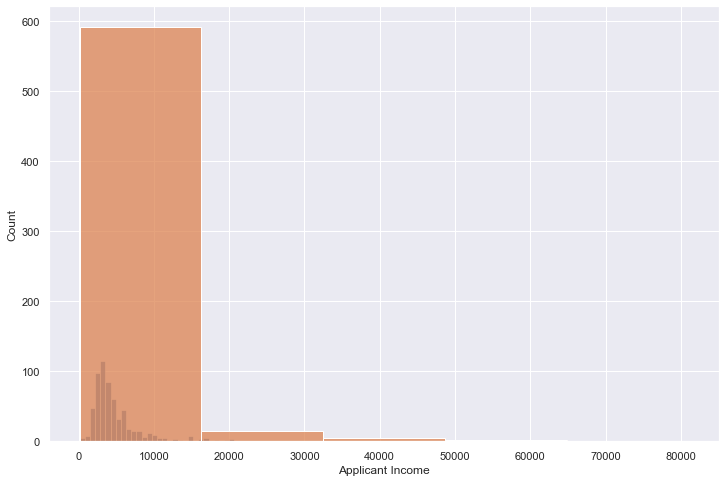

In [357]:
# Default bins
sns.histplot(loan['ApplicantIncome'])

# Try with 5 and 10 bins (used 5)
ax = sns.histplot(loan['ApplicantIncome'], bins=5)
ax.set(xlabel='Applicant Income');


Look at box plots to understand the distributions. 

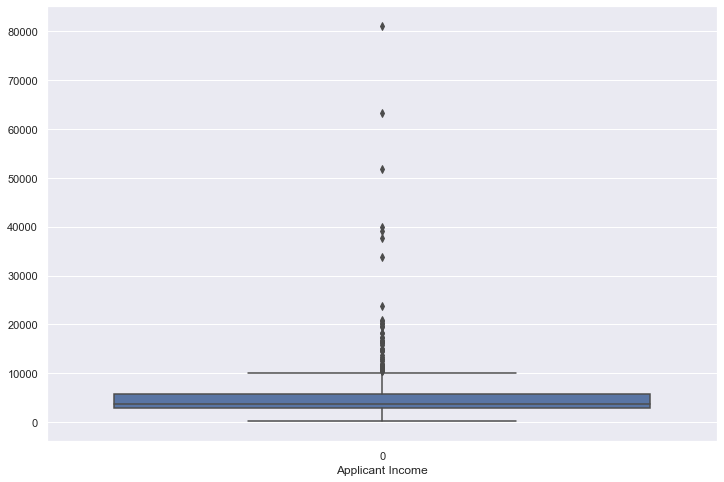

In [358]:
ax = sns.boxplot(loan['ApplicantIncome'])
ax.set(xlabel='Applicant Income');

Look at the distribution of income segregated  by `Education`

In [359]:
loan_income = loan['ApplicantIncome'].mean()
loan_income

5403.459283387622

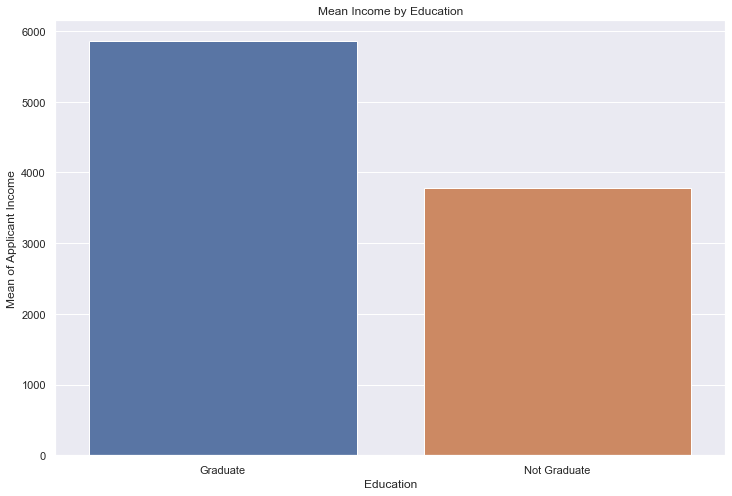

In [360]:
ax = sns.barplot(data=loan, x='Education', y='ApplicantIncome', errorbar=None)
ax.set(ylabel='Mean of Applicant Income', title='Mean Income by Education');

Look at the histogram and boxplot of LoanAmount

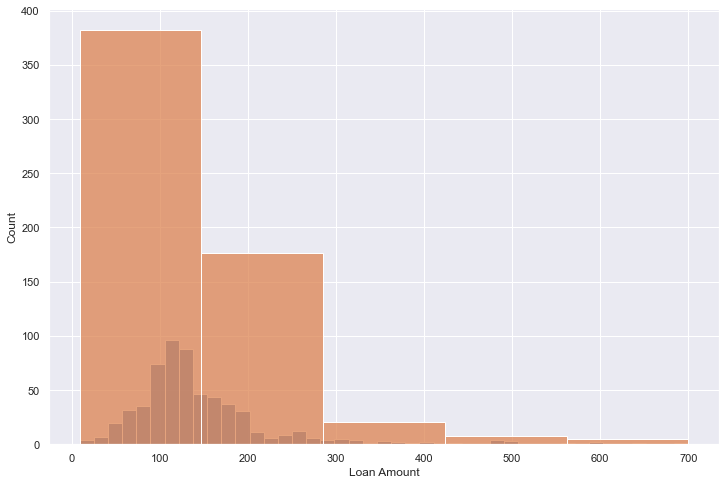

In [361]:
# Default bins
sns.histplot(loan['LoanAmount'])

# 5 bins
ax = sns.histplot(loan['LoanAmount'], bins=5)
ax.set(xlabel= 'Loan Amount');

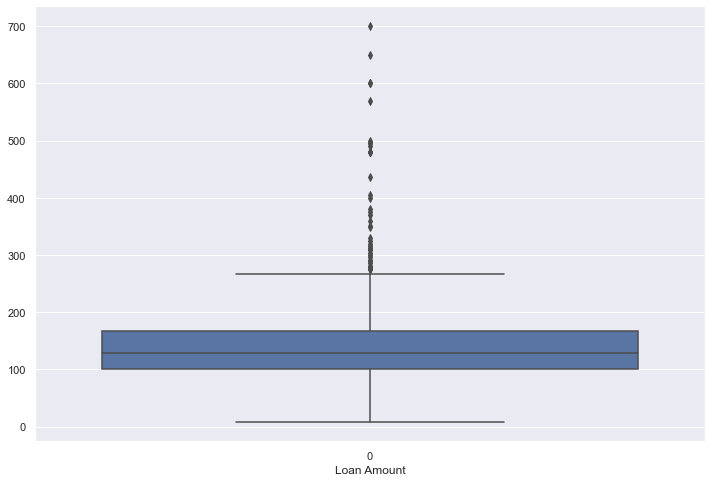

In [362]:
ax = sns.boxplot(loan['LoanAmount'])
ax.set(xlabel='Loan Amount');

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing as well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical Variable Analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

#### Total Income by Property Area, Marital Status, and Self Employment

In [494]:
pivot = np.round(pd.pivot_table(
            loan, values='Total_Income', 
            index=['Married','Self_Employed'], 
            columns=['Property_Area'],
            aggfunc=np.mean
            ))

pivot

Property_Area           Rural  Semiurban    Urban
Married Self_Employed                            
No      No             6198.0     5977.0   5757.0
        Yes            6021.0     7733.0  10599.0
Yes     No             7506.0     6797.0   7265.0
        Yes            8858.0     9325.0   9179.0

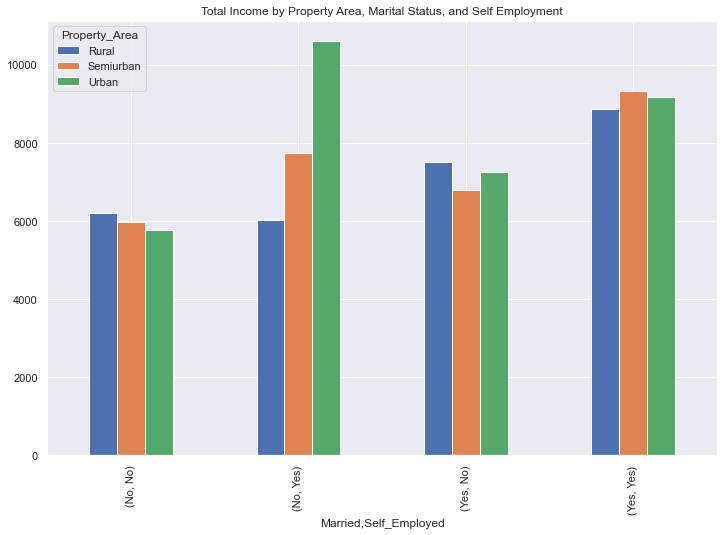

In [496]:
pivot.plot.bar(title='Total Income by Property Area, Marital Status, and Self Employment');

#### Income by Gender and Education

In [471]:
pivot = np.round(pd.pivot_table(
            loan, values='ApplicantIncome',
            index=['Gender'],
            columns=['Education']
            ))

pivot

Education,Graduate,Not Graduate
Gender,,
Female,4646.0,4630.0
Male,6145.0,3628.0


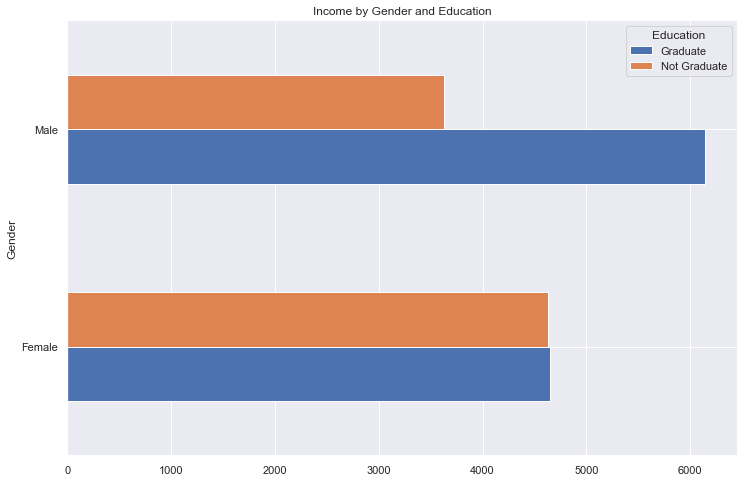

In [473]:
pivot.plot.barh(title='Income by Gender and Education');

#### Loan Amount by Marital Status and Number of Dependents

In [491]:
pivot = np.round(pd.pivot_table(
            loan, values='LoanAmount',
            index=['Dependents'],
            columns=['Married']
            ))

pivot

Married,No,Yes
Dependents,,
0,127.0,145.0
1,120.0,169.0
2,127.0,152.0
3+,242.0,181.0


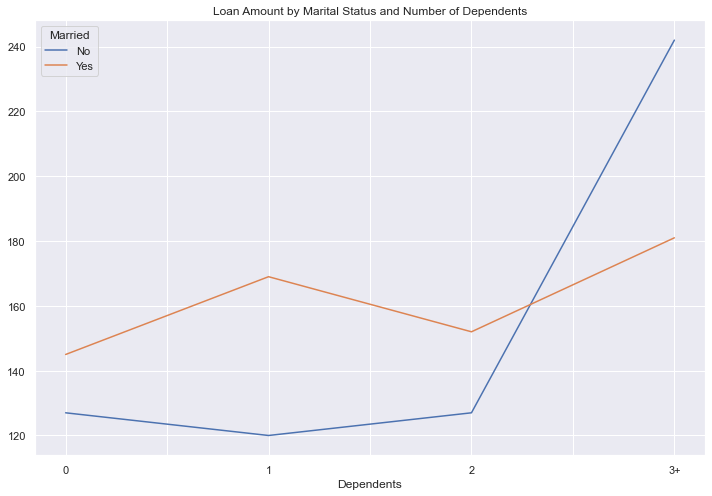

In [492]:
pivot.plot.line(title='Loan Amount by Marital Status and Number of Dependents');

#### Loan Status by Loan Amount and Loan Term

#### Gender Nulls

In [519]:
pivot = np.round(pd.pivot_table(
            loan, values='LoanAmount',
            index=['Loan_Status'],
            columns=['Loan_Amount_Term'],
            fill_value=0))

pivot

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,,
N,0,118.0,0,172,0.0,132.0,205.0,112.0,156.0,114.0
Y,111,0.0,140,119,22.0,156.0,99.0,231.0,142.0,208.0


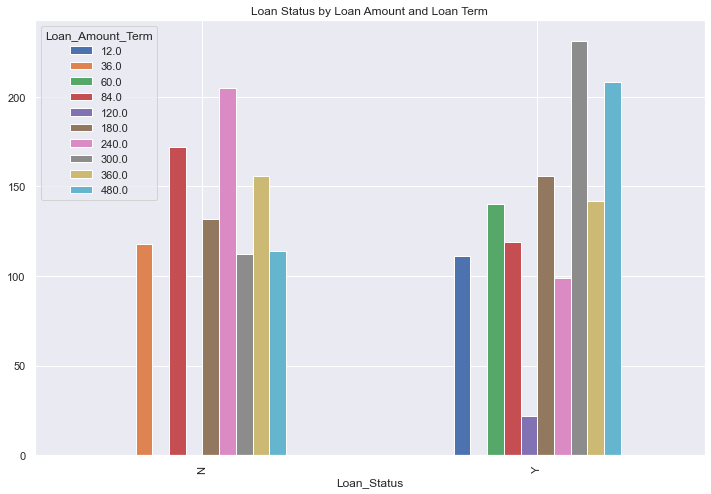

In [521]:
pivot.plot.bar(title='Loan Status by Loan Amount and Loan Term');

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [365]:
# Re-check which columns have null values
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Gender Nulls

In [366]:
# View null rows
loan[loan['Gender'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N


In [367]:
# We will impute nulls for Gender by filling them with the mode of for Genders
# Especially as there are significantly more male applicants than female applicants

loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [368]:
# Let's fill the nulls
loan['Gender'].fillna('Male', inplace=True)

#### Married Nulls

In [369]:
# View null rows
loan[loan['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [370]:
# We will impute nulls for Married by taking a look at each row and their related columns, specifically since there are only 3 rows to deal with

# Based on observations, let us assume that those with no coapplicant incomes are single, and those that have a coapplicant income are married

# Fill for married
loan.loc[104, 'Married'] = 'Yes'

# Fill for unmarried
loan.loc[228, 'Married'] = 'No'
loan.loc[435, 'Married'] = 'No'

#### Dependents Nulls

In [371]:
# View null rows
loan[loan['Dependents'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y


In [372]:
# The null rows belong to male applicants who are either married or not married.
# Let's check the mode of dependents for this demographic

dep = loan[(loan['Gender'] == 'Male')]
dep = a[['Married','Gender', 'Dependents']]
dep.value_counts()

Married  Gender  Dependents
Yes      Male    0             154
No       Male    0             111
Yes      Male    2              88
                 1              73
                 3+             44
No       Male    1              10
                 2               6
                 3+              4
dtype: int64

In [373]:
# We will impute nulls for Dependents based on the mode for applicants that are male, and married
# Additionally, we will assume that if dependents is not specified it can be 0

# Let's fill the nulls
loan['Dependents'].fillna('0', inplace=True)

#### Self-Employed Nulls

In [374]:
# View null rows
loan[loan['Self_Employed'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N


In [375]:
# We will impute nulls for Self_Employed by filling them with the mode for Self_Emplyed 
# Especially as there are significantly more applicants who are not self employed

loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [376]:
# Let's fill the nulls
loan['Self_Employed'].fillna('No', inplace=True)

#### Loan Amount Nulls

In [377]:
# View null rows
loan[loan['LoanAmount'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N


In [378]:
# We will impute nulls for LoanAmount by filling them with the mean of all loan amounts

# Calculate mean
print('Mean Loan $:', round(loan['LoanAmount'].mean(),2))

Mean Loan $: 146.41


In [379]:
# Let's fill the nulls
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

#### Credit History Nulls

In [380]:
# View null rows
loan[loan['Credit_History'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [381]:
# We will impute nulls for Credit_History by filling them with the mode of credit history

# Let's see what the mode is - in this case, it is a period of 360 months (3 years)
loan['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [382]:
# Let's fill the nulls
loan['Credit_History'].fillna(1, inplace=True)

#### Loan Amount Term Nulls

In [383]:
# View null rows
loan[loan['Loan_Amount_Term'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N


In [384]:
# We will impute nulls for Loan_Amount_Term by filling them with the mode of all loan terms

# Let's see what the mode is - in this case, it is a period of 360 months (3 years)
loan['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [385]:
# Let's fill the nulls
loan['Loan_Amount_Term'].fillna(360, inplace=True)

In [386]:
# Confirm that all nulls have been handled
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No more nulls!

### Extreme Values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

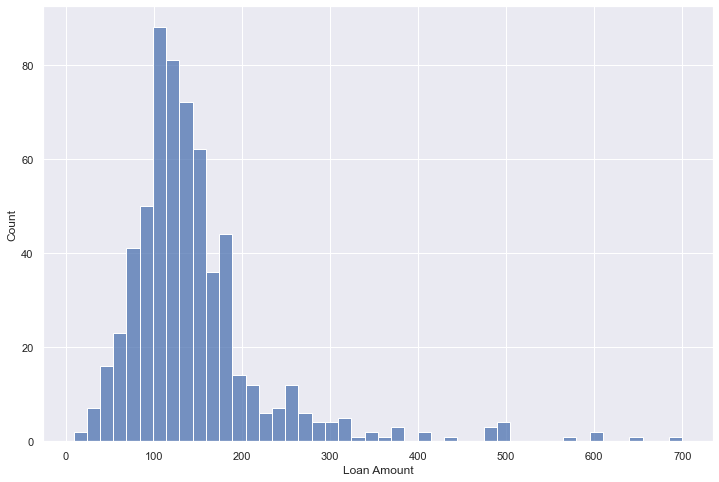

In [387]:
# Before log transformation
ax = sns.histplot(loan['LoanAmount'])
ax.set(xlabel='Loan Amount');

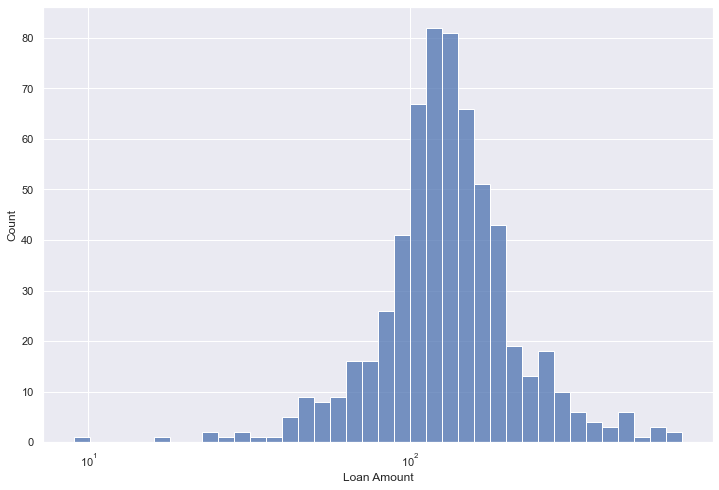

In [388]:
# After log transformation
ax = sns.histplot(loan['LoanAmount'], log_scale=True)
ax.set(xlabel='Loan Amount');

Combine both incomes as total income and take a log transformation of the same.

In [389]:
# Create total income column
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


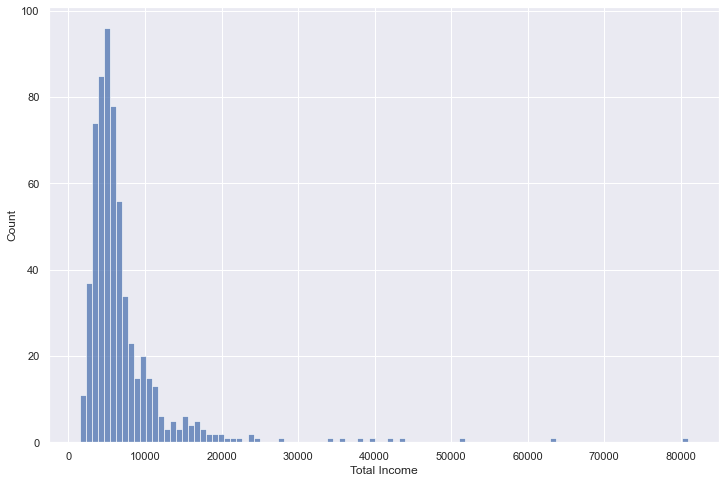

In [390]:
# Before log transformation
ax = sns.histplot(loan['Total_Income'])
ax.set(xlabel='Total Income');

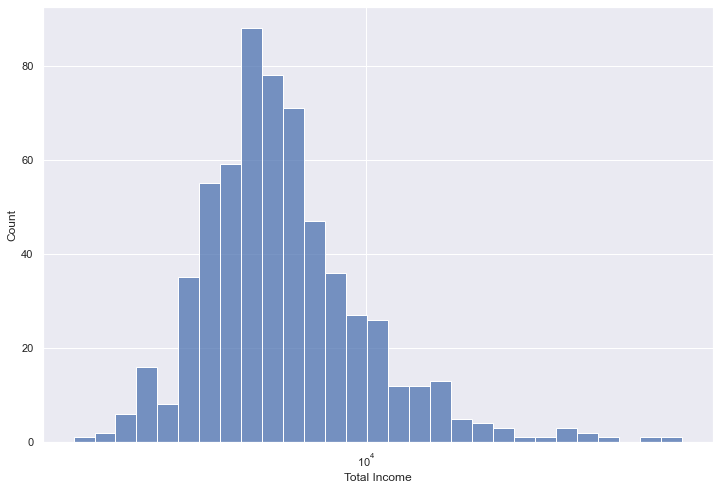

In [391]:
# After log transformation
ax = sns.histplot(loan['Total_Income'], log_scale=True)
ax.set(xlabel='Total Income');

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python